# Projet Machine Learning

#### Le but de ce projet est de prédir la température critique d'un superconducteur en utilisant 81 variables.
NB : problème de régression

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# charger les données d'entrainement
data = pd.read_csv("data_train.csv").drop("Unnamed: 0", axis=1)
print("La taille de nos données d'entrainement est ", data.shape)
display(data.head())


# charger les données de test
data_test = pd.read_csv("data_test.csv").drop("Unnamed: 0", axis=1)
print("La taille de nos données de test est ", data_test.shape)
display(data_test.head())

La taille de nos données d'entrainement est  (15948, 82)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


La taille de nos données de test est  (5315, 81)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,55.604143,59.774531,33.333244,35.253933,0.966676,0.877867,128.09447,39.509441,51.685171,...,2.750000,2.800000,2.710806,2.766324,1.373004,1.337712,1,0.500000,0.433013,0.400000
1,6,82.156483,45.546492,68.911502,33.264949,1.667846,1.606485,124.90825,11.265538,37.507222,...,3.166667,2.192308,2.884499,2.130439,1.694415,1.439960,4,0.984615,1.462494,0.691666
2,5,63.557790,80.867775,43.121047,66.942841,1.315075,1.118864,125.31630,39.099021,46.911243,...,2.600000,2.165714,2.491462,2.136123,1.564957,1.388270,2,0.788571,0.800000,0.401385
3,6,107.796145,61.552608,83.859433,39.533227,1.615083,1.698400,184.59060,12.861207,59.742304,...,2.500000,2.138917,2.401874,2.102078,1.748971,1.495383,2,0.916750,0.763763,0.480401
4,2,145.434735,139.105266,145.288096,139.096555,0.692139,0.084960,13.05853,134.455167,6.529265,...,3.000000,3.000000,3.000000,3.000000,0.693147,0.079135,0,2.908200,0.000000,0.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15948 entries, 0 to 15947
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               15948 non-null  int64  
 1   mean_atomic_mass                 15948 non-null  float64
 2   wtd_mean_atomic_mass             15948 non-null  float64
 3   gmean_atomic_mass                15948 non-null  float64
 4   wtd_gmean_atomic_mass            15948 non-null  float64
 5   entropy_atomic_mass              15948 non-null  float64
 6   wtd_entropy_atomic_mass          15948 non-null  float64
 7   range_atomic_mass                15948 non-null  float64
 8   wtd_range_atomic_mass            15948 non-null  float64
 9   std_atomic_mass                  15948 non-null  float64
 10  wtd_std_atomic_mass              15948 non-null  float64
 11  mean_fie                         15948 non-null  float64
 12  wtd_mean_fie      

## Séparation des données 

On sépare les données en données d'entrainement et de test

In [30]:
X = data.drop("critical_temp", axis=1)
Y = pd.DataFrame(data = data["critical_temp"])

print(X.shape)
print(Y.shape)

X_test = data_test

print("La taille de notre X_train est", X.shape)
print("La taille de notre y_train est", Y.shape)
print("La taille de notre X_test est", X_test.shape)

(15948, 81)
(15948, 1)
La taille de notre X_train est (15948, 81)
La taille de notre y_train est (15948, 1)
La taille de notre X_test est (5315, 81)


### Normaliser et standardiser les données

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
#X_test = scaler.transform(X_test)

print(scaler.mean_.shape)

(81,)


## Test de plusieurs models
On applique le PCA sur les données avant de les transférer à ces models

### Appliquer PCA sur les données d'entrainement et de test

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pca.fit(X)

# nombre de composantes 
print("On a ", pca.n_components_, "composantes qui nous donne ", pca.explained_variance_ratio_, "de variance \n")

# variance de chaque composante
print("Les variances de chaque composante est :")
print(pca.explained_variance_ratio_, "\n")

# les valeurs propres
print('Les valeurs propres sont :')
print(pca.singular_values_, "\n")

# Appliquer PCA sur les données d'entrainement et de test 
X = pca.transform(X)
display("la taille des données après transformation PCA", X.shape)

#X_test = pca.transform(X_test)
#display("la taille des données de test après transformation PCA", X_test.shape)

On a  31 composantes qui nous donne  [0.38800075 0.10527944 0.09555421 0.07970638 0.05889814 0.03821824
 0.03609843 0.03106384 0.02357175 0.0196522  0.01809589 0.01471758
 0.01178704 0.00998264 0.00986277 0.00774087 0.00716952 0.00538403
 0.00484083 0.00380681 0.00302793 0.00285754 0.00254671 0.00206351
 0.00196196 0.0018668  0.00169    0.00141821 0.00126717 0.00115492
 0.00102486] de variance 

Les variances de chaque composante est :
[0.38800075 0.10527944 0.09555421 0.07970638 0.05889814 0.03821824
 0.03609843 0.03106384 0.02357175 0.0196522  0.01809589 0.01471758
 0.01178704 0.00998264 0.00986277 0.00774087 0.00716952 0.00538403
 0.00484083 0.00380681 0.00302793 0.00285754 0.00254671 0.00206351
 0.00196196 0.0018668  0.00169    0.00141821 0.00126717 0.00115492
 0.00102486] 

Les valeurs propres sont :
[707.96519196 368.78003588 351.33429518 320.87963444 275.83311498
 222.19330465 215.94333569 200.31947254 174.49843201 159.33134921
 152.89230859 137.88400482 123.39512096 113.5581804

'la taille des données après transformation PCA'

(15948, 31)

### Visualisation des données
Affichage des températures critiques en fonction de la première composante

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']


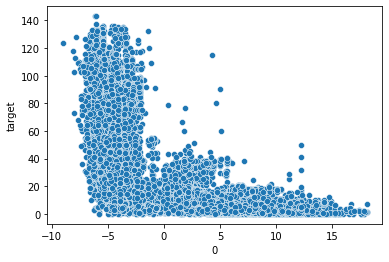

In [33]:
import seaborn as sns

col_names = []
for i in range(31):
    col_names.append(str(i))
print(col_names)
df_train = pd.DataFrame(X, columns = col_names)
df_train['target'] = Y
sns.scatterplot(data=df_train, x="0", y="target")

### Séparation des données d'entraînement en données d'entraînement et de validation

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42)

### Réseau de neuronnes

Construction et compilation du model

In [35]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [36]:
NN_model = Sequential()
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               4096      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 168,961
Trainable params: 168,961
Non-trainable params: 0
_________________________________________________________________


Definition du callback, ce fichier enregistra les poids du model ayant la meilleur performance, car nous avons utiliser l'option save_best_only de la fonction ModelCheckpoint..

In [37]:
checkpoint_name = 'Best-Weights.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

Entraîner le model

In [38]:
NN_model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/10
150/150 [==============================] - 1s 3ms/step - loss: 1061.5540 - mean_squared_error: 1061.5540 - val_loss: 238.6041 - val_mean_squared_error: 238.6041

Epoch 00001: val_loss improved from inf to 238.60411, saving model to Best-Weights.hdf5
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 260.6822 - mean_squared_error: 260.6822 - val_loss: 219.4034 - val_mean_squared_error: 219.4034

Epoch 00002: val_loss improved from 238.60411 to 219.40337, saving model to Best-Weights.hdf5
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 228.0326 - mean_squared_error: 228.0326 - val_loss: 237.1079 - val_mean_squared_error: 237.1079

Epoch 00003: val_loss did not improve from 219.40337
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 211.2941 - mean_squared_error: 211.2941 - val_loss: 194.6367 - val_mean_squared_error: 194.6367

Epoch 00004: val_loss improved from 219.40337 to 194.63675, saving model to Bes

Tester le model sur les données de validation

In [39]:
pred = NN_model.predict(X_val)
mean_squared_error(pred, Y_val)

174.5281870755142

Dans la suite, on vous présente différentes méthodes que nous avons utilisé pour essayer d'améliorer le temps de calcul et la performance...

## Model des forets aléatoires avec la validation croisée 

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
rf_model = RandomForestRegressor(n_estimators = 200, criterion = 'mse', max_features = 10, min_samples_split = 2, random_state = 42)

In [41]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

pred = cross_val_predict(rf_model, X, Y, cv=cv, n_jobs=-1)

In [42]:
mean_squared_error(pred, Y)

103.01266051174305

## Sélection des variables

Suppression des variables non corrélées avec la variable dépendante...

In [45]:
df = data
cor = df.corr()
print("nombre totale de variables initiales : " , len(cor.columns))
cor_target = abs(cor["critical_temp"])

#threshold
th = 0.15

relevant_features  = cor_target[cor_target > th]
list_ft = list(relevant_features.keys())
list_ft.remove('critical_temp')

print("nombre totale de variables restantes : " , len(list_ft))


nombre totale de variables initiales :  82
nombre totale de variables restantes :  69


Affichage d'une partie de la matrice de corrélation. On constate par exemple que les variables mean_Valence et gmean_Valence sont fortement corrélées entre eux (0.99).

(6, 6)

0.0004

143.0

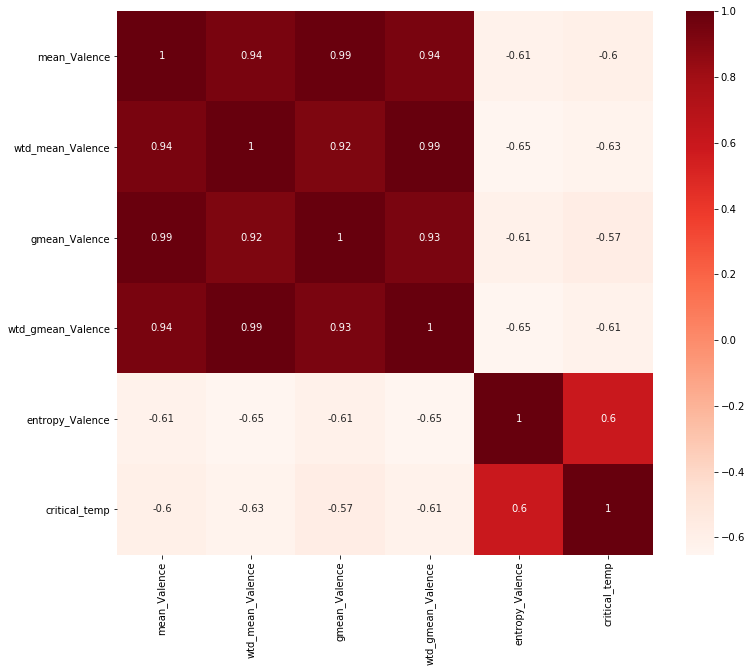

In [46]:
import seaborn as sns
plt.figure(figsize=(12,10))
df1 = df.filter(items=['mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'critical_temp'])
cor1 = df1.corr()
display(cor1.shape)

display(df['critical_temp'].min())
display(df['critical_temp'].max())

sns.heatmap(cor1, annot=True, cmap=plt.cm.Reds)
#plt.savefig('correlation_sub_matrix', format='png')

Suppression une des variables indépendantes corrélées entre eux, on gardant la plus corrélée avec
la variable dépendante...

In [48]:
c = 0
ft_to_remove = []

final_length = -1

while(final_length != len(list_ft)):
    for ft in list_ft:
        for ft_ in list_ft:
            if(ft == ft_):
                continue
            else:
                if(abs(cor[ft][ft_]) > 0.8):
                    if(abs(cor[ft]['critical_temp']) > abs(cor[ft_]['critical_temp'])):
                        if ft_ not in ft_to_remove:
                            c += 1
                            ft_to_remove.append(ft_)
                            
                    else:
                        if ft not in ft_to_remove:
                            c += 1
                            ft_to_remove.append(ft)
                            
    final_length = len(list_ft)




    for ft in ft_to_remove:
        list_ft.remove(ft)
    

print("We will keep the ", len(list_ft), " following features. ", list_ft)





We will keep the  19  following features.  ['wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'wtd_range_fie', 'range_atomic_radius', 'wtd_range_atomic_radius', 'range_Density', 'gmean_ElectronAffinity', 'wtd_range_ElectronAffinity', 'wtd_std_ElectronAffinity', 'wtd_gmean_FusionHeat', 'std_FusionHeat', 'mean_ThermalConductivity', 'gmean_ThermalConductivity', 'wtd_range_ThermalConductivity', 'wtd_std_ThermalConductivity', 'wtd_mean_Valence', 'wtd_range_Valence', 'wtd_std_Valence']


Création des nouveaux données d'entrainements

In [49]:
X = df.filter(items = list_ft)
Y = df["critical_temp"]
display(X.shape)
display(Y.shape)

(15948, 19)

(15948,)

In [50]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42)

display(X_train.shape)
display(Y_train.shape)
display(type(X_train))
Y_train = Y_train.to_numpy().reshape(11961,)
display(type(Y_train))

(11961, 19)

(11961,)

pandas.core.frame.DataFrame

numpy.ndarray

Test du même modèle en utilisant les variables sélectionnées

In [51]:
rf = RandomForestRegressor(n_estimators = 200, criterion = 'mse', min_samples_split = 2, random_state = 42)# Train the model on training data
rf.fit(X_train, Y_train);

In [52]:
pred = rf.predict(X_val)
mean_squared_error(pred, Y_val)

105.82710264777285

Test du même réseaux de neuronnes en utilisant les variables sélectionnées

In [53]:
NN_model = Sequential()
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               2560      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 167,425
Trainable params: 167,425
Non-trainable params: 0
_________________________________________________________________


In [54]:
NN_model.fit(X_train, Y_train, epochs=200, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/200
150/150 [==============================] - 1s 3ms/step - loss: 1601.5598 - mean_squared_error: 1601.5598 - val_loss: 422.5030 - val_mean_squared_error: 422.5030

Epoch 00001: val_loss did not improve from 159.78584
Epoch 2/200
150/150 [==============================] - 0s 2ms/step - loss: 460.6423 - mean_squared_error: 460.6423 - val_loss: 401.9659 - val_mean_squared_error: 401.9659

Epoch 00002: val_loss did not improve from 159.78584
Epoch 3/200
150/150 [==============================] - 0s 2ms/step - loss: 397.2984 - mean_squared_error: 397.2984 - val_loss: 358.3464 - val_mean_squared_error: 358.3464

Epoch 00003: val_loss did not improve from 159.78584
Epoch 4/200
150/150 [==============================] - 0s 2ms/step - loss: 405.6234 - mean_squared_error: 405.6234 - val_loss: 336.5758 - val_mean_squared_error: 336.5758

Epoch 00004: val_loss did not improve from 159.78584
Epoch 5/200
150/150 [==============================] - 0s 3ms/step - loss: 423.5772 - mean_squared

150/150 [==============================] - 0s 2ms/step - loss: 297.6977 - mean_squared_error: 297.6977 - val_loss: 280.5934 - val_mean_squared_error: 280.5934

Epoch 00037: val_loss did not improve from 159.78584
Epoch 38/200
150/150 [==============================] - 0s 2ms/step - loss: 304.3094 - mean_squared_error: 304.3094 - val_loss: 267.0084 - val_mean_squared_error: 267.0084

Epoch 00038: val_loss did not improve from 159.78584
Epoch 39/200
150/150 [==============================] - 0s 2ms/step - loss: 293.4004 - mean_squared_error: 293.4004 - val_loss: 283.2575 - val_mean_squared_error: 283.2575

Epoch 00039: val_loss did not improve from 159.78584
Epoch 40/200
150/150 [==============================] - 0s 2ms/step - loss: 281.7655 - mean_squared_error: 281.7655 - val_loss: 305.5895 - val_mean_squared_error: 305.5895

Epoch 00040: val_loss did not improve from 159.78584
Epoch 41/200
150/150 [==============================] - 0s 2ms/step - loss: 304.7104 - mean_squared_error: 30

150/150 [==============================] - 1s 5ms/step - loss: 264.3650 - mean_squared_error: 264.3650 - val_loss: 245.1159 - val_mean_squared_error: 245.1159

Epoch 00073: val_loss did not improve from 159.78584
Epoch 74/200
150/150 [==============================] - 0s 2ms/step - loss: 261.0315 - mean_squared_error: 261.0315 - val_loss: 272.5074 - val_mean_squared_error: 272.5074

Epoch 00074: val_loss did not improve from 159.78584
Epoch 75/200
150/150 [==============================] - 0s 2ms/step - loss: 263.1457 - mean_squared_error: 263.1457 - val_loss: 270.7928 - val_mean_squared_error: 270.7928

Epoch 00075: val_loss did not improve from 159.78584
Epoch 76/200
150/150 [==============================] - 0s 2ms/step - loss: 257.3423 - mean_squared_error: 257.3423 - val_loss: 251.8981 - val_mean_squared_error: 251.8981

Epoch 00076: val_loss did not improve from 159.78584
Epoch 77/200
150/150 [==============================] - 0s 2ms/step - loss: 254.2931 - mean_squared_error: 25

150/150 [==============================] - 0s 3ms/step - loss: 241.9802 - mean_squared_error: 241.9802 - val_loss: 241.3480 - val_mean_squared_error: 241.3480

Epoch 00109: val_loss did not improve from 159.78584
Epoch 110/200
150/150 [==============================] - 0s 2ms/step - loss: 240.1765 - mean_squared_error: 240.1765 - val_loss: 240.7080 - val_mean_squared_error: 240.7080

Epoch 00110: val_loss did not improve from 159.78584
Epoch 111/200
150/150 [==============================] - 0s 2ms/step - loss: 224.9477 - mean_squared_error: 224.9477 - val_loss: 241.7569 - val_mean_squared_error: 241.7569

Epoch 00111: val_loss did not improve from 159.78584
Epoch 112/200
150/150 [==============================] - 0s 2ms/step - loss: 229.9186 - mean_squared_error: 229.9186 - val_loss: 234.7968 - val_mean_squared_error: 234.7968

Epoch 00112: val_loss did not improve from 159.78584
Epoch 113/200
150/150 [==============================] - 0s 2ms/step - loss: 244.7545 - mean_squared_error

150/150 [==============================] - 0s 2ms/step - loss: 246.3584 - mean_squared_error: 246.3584 - val_loss: 244.2596 - val_mean_squared_error: 244.2596

Epoch 00145: val_loss did not improve from 159.78584
Epoch 146/200
150/150 [==============================] - 0s 2ms/step - loss: 229.0897 - mean_squared_error: 229.0897 - val_loss: 239.1192 - val_mean_squared_error: 239.1192

Epoch 00146: val_loss did not improve from 159.78584
Epoch 147/200
150/150 [==============================] - 0s 2ms/step - loss: 225.6692 - mean_squared_error: 225.6692 - val_loss: 230.1378 - val_mean_squared_error: 230.1378

Epoch 00147: val_loss did not improve from 159.78584
Epoch 148/200
150/150 [==============================] - 0s 2ms/step - loss: 230.3974 - mean_squared_error: 230.3974 - val_loss: 263.4696 - val_mean_squared_error: 263.4696

Epoch 00148: val_loss did not improve from 159.78584
Epoch 149/200
150/150 [==============================] - 0s 2ms/step - loss: 248.3038 - mean_squared_error

150/150 [==============================] - 0s 2ms/step - loss: 226.2908 - mean_squared_error: 226.2908 - val_loss: 248.8106 - val_mean_squared_error: 248.8106

Epoch 00181: val_loss did not improve from 159.78584
Epoch 182/200
150/150 [==============================] - 0s 2ms/step - loss: 210.6565 - mean_squared_error: 210.6565 - val_loss: 215.7471 - val_mean_squared_error: 215.7471

Epoch 00182: val_loss did not improve from 159.78584
Epoch 183/200
150/150 [==============================] - 0s 2ms/step - loss: 194.0137 - mean_squared_error: 194.0137 - val_loss: 213.0359 - val_mean_squared_error: 213.0359

Epoch 00183: val_loss did not improve from 159.78584
Epoch 184/200
150/150 [==============================] - 0s 2ms/step - loss: 206.9122 - mean_squared_error: 206.9122 - val_loss: 253.6405 - val_mean_squared_error: 253.6405

Epoch 00184: val_loss did not improve from 159.78584
Epoch 185/200
150/150 [==============================] - 0s 2ms/step - loss: 227.0210 - mean_squared_error

In [55]:
pred = NN_model.predict(X_val)
mean_squared_error(pred, Y_val)

252.31713271794058

## Meilleur Model

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
rf_model = RandomForestRegressor(n_estimators = 200, criterion = 'mse', max_features = 10, min_samples_split = 2, random_state = 42)

In [57]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

pred = cross_val_predict(rf_model, X, Y, cv=cv, n_jobs=-1)

In [58]:
mean_squared_error(pred, Y)

94.1225414334276

In [59]:
X_train.shape

(11961, 19)

In [60]:
display(rf_model.fit(X_train, Y_train))
display(rf_model.score(X_val, Y_val))

RandomForestRegressor(max_features=10, n_estimators=200, random_state=42)

0.9113077355743876

In [61]:
X_test = data_test.filter(items = list_ft)
pred_test = rf_model.predict(X_test)

np.savetxt('predictions.csv', pred_test, delimiter=',')